In [29]:
from importlib import reload

In [30]:
import src.tm_roller; reload(src.tm_roller)
import src.bsln_kde;reload(src.bsln_kde)
import src.bsln_bower;reload(src.bsln_bower)

from src.tm_roller import TM_ROLLER
from src.bsln_kde import KDE, prep_data
from src.spatial_unit import baltimore_grids
from src.eval_metric import hit_rate
from src.bsln_bower import Bower

In [31]:
data = prep_data('data/open-baltimore/raw/BPD_Part_1_Victim_Based_Crime_Data.csv', 
                 col_lon='Longitude', col_lat='Latitude', col_date='CrimeDate', to_epsg=3559)

In [32]:
tune_sd = '2013-01-01'
tune_ed = '2013-12-31'
train_tw = 60
vstep = 1
vtw = 1
vsd = '2014-03-02'
ved = '2014-03-10'
grid_size=200

In [51]:
data.index[0].strftime('%Y-%m-%d')

'2013-01-01'

In [33]:
grids = baltimore_grids(grid_size=grid_size)

# for each tune period

In [34]:
# method = KDE(verbose=1, bw=400)
method = Bower(grid_size, bw=400, tw=train_tw, verbose=1)

In [35]:
str(method)

'Bower method: weighted by distance and time, bandwidth=400, time window=60, verbose=1'

In [36]:
# method.tune(data.loc[tune_sd:tune_ed].coords, cv=10, bw_choice=[10, 100, 200, 300, 400, 500], n_jobs=4)

In [39]:
tmroller = TM_ROLLER(method, data.coords, vsd, ved, step=vstep, tw=vtw, verbose=2)

In [40]:
res = tmroller.eval(hit_rate, grids)

total number of experiment: 29
No.1 exp, testing period: 2014-03-02 ~ 2014-03-02
No.2 exp, testing period: 2014-03-03 ~ 2014-03-03
No.3 exp, testing period: 2014-03-04 ~ 2014-03-04
No.4 exp, testing period: 2014-03-05 ~ 2014-03-05
No.5 exp, testing period: 2014-03-06 ~ 2014-03-06
No.6 exp, testing period: 2014-03-07 ~ 2014-03-07
No.7 exp, testing period: 2014-03-08 ~ 2014-03-08
No.8 exp, testing period: 2014-03-09 ~ 2014-03-09
No.9 exp, testing period: 2014-03-10 ~ 2014-03-10


In [41]:
import pandas as pd

In [42]:
df = pd.DataFrame.from_dict(res)

In [44]:
df

,2014-03-02~2014-03-02,2014-03-03~2014-03-03,2014-03-04~2014-03-04,2014-03-05~2014-03-05,2014-03-06~2014-03-06,2014-03-07~2014-03-07,2014-03-08~2014-03-08,2014-03-09~2014-03-09,2014-03-10~2014-03-10
10%,0.470588,0.438596,0.432990,0.398058,0.411215,0.422018,0.519231,0.397849,0.435115
20%,0.717647,0.631579,0.711340,0.533981,0.523364,0.669725,0.625000,0.602151,0.625954
30%,0.811765,0.736842,0.793814,0.640777,0.663551,0.798165,0.711538,0.795699,0.709924
40%,0.858824,0.877193,0.855670,0.825243,0.785047,0.899083,0.836538,0.913978,0.847328
50%,0.976471,0.929825,0.907216,0.883495,0.906542,0.944954,0.923077,0.956989,0.923664
60%,0.988235,0.964912,0.948454,0.951456,0.953271,0.972477,0.942308,1.000000,0.992366
70%,1.000000,0.964912,0.969072,0.990291,0.990654,1.000000,0.961538,1.000000,1.000000
80%,1.000000,0.982456,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
90%,1.000000,0.982456,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
%matplotlib inline

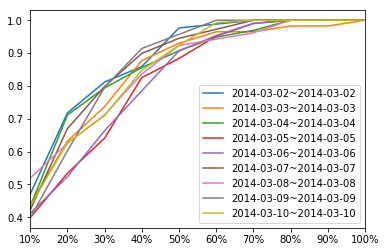

In [46]:
df.plot()